In [40]:
library(igraph)

# 2 Google Network

## Question 18

In [41]:
path ="gplus/" 
edge_files = list.files(path=path,pattern="edges") 
circle_files = list.files(path=path,pattern="circles")

count = 0
for (file in circle_files){
    file_path = paste(path, file, sep="")
    if (length(readLines(file_path)) > 2){
        count = count + 1
    }
}
print(count)

[1] 57


## Question 19

In [42]:
get_graph <- function(core_node) {
    # Init
    circles = list()
    # Get circles of core nodes
    circles_path = paste(path, core_node, ".circles", sep="")
    file_lines = readLines(circles_path)
    for (i in 1:length(file_lines)){
        circle = strsplit(file_lines[i], "\t")
        circles[[i]] = circle[[1]][-1]
    }
    # Get graph of core nodes with more than 2 circles
    if (length(circles) > 2){
        edges_path = paste(path, core_node, ".edges", sep="")
        graph = read.graph(edges_path, format="ncol", directed=TRUE)
        graph = add.vertices(graph, nv=1, name=core_node)
        core_edges = c()
        num_nodes = vcount(graph)
        for (i in 1:(num_nodes-1)){
            core_edges = c(core_edges, c(num_nodes, i))
        }
        graph = add.edges(graph, core_edges)
    }
    # Return circles and graph
    results = list("circles"=circles, "graph"=graph)
    return(results)
}

In [43]:
target_nodes = c('109327480479767108490', 
                '115625564993990145546',
                '101373961279443806744')

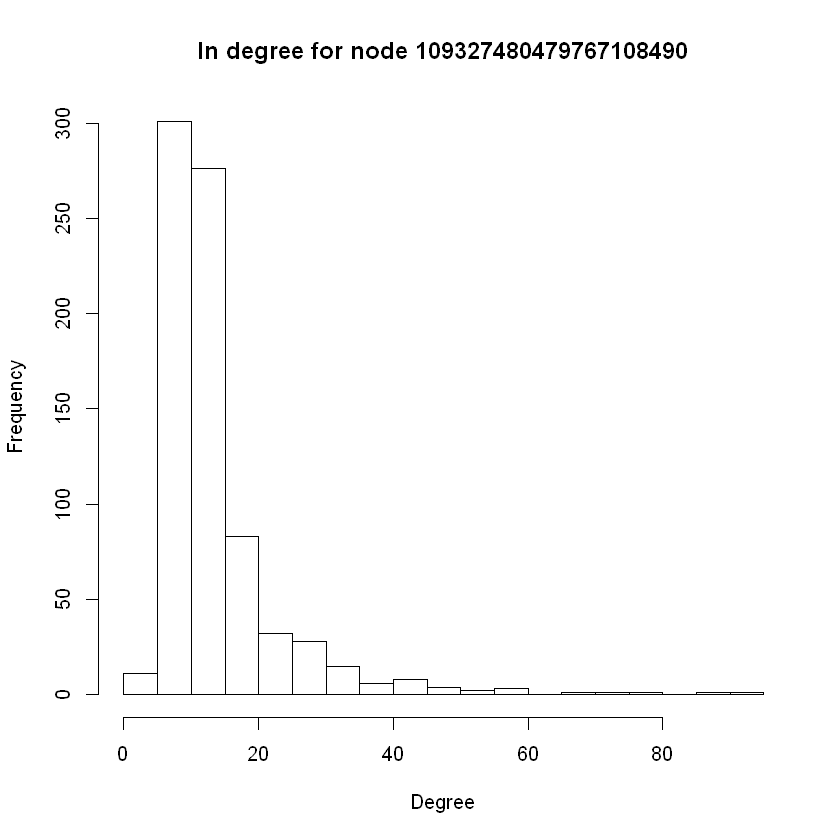

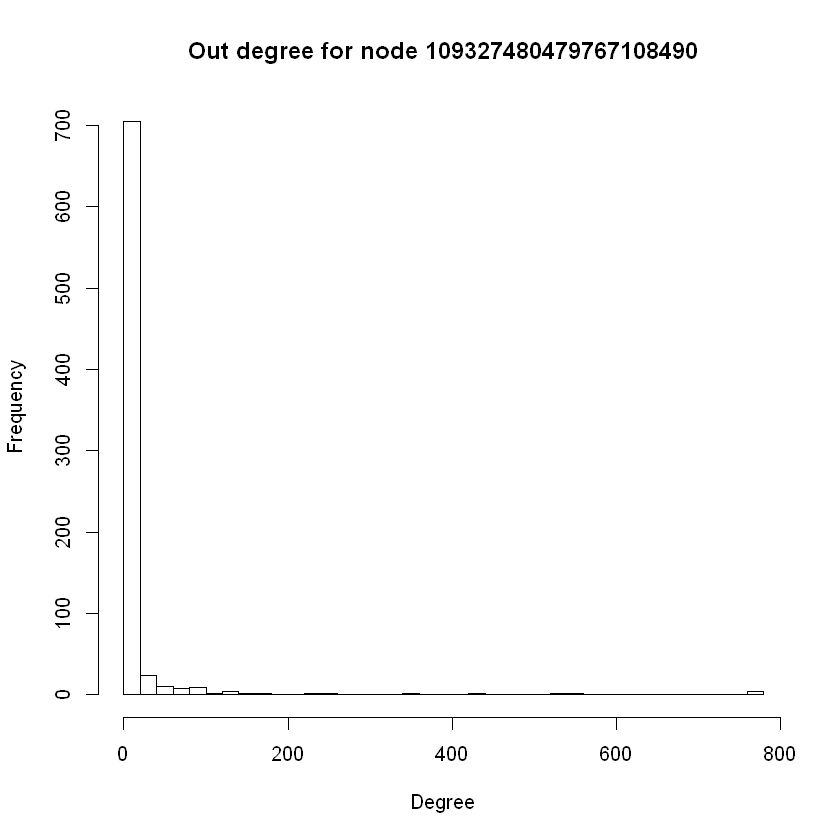

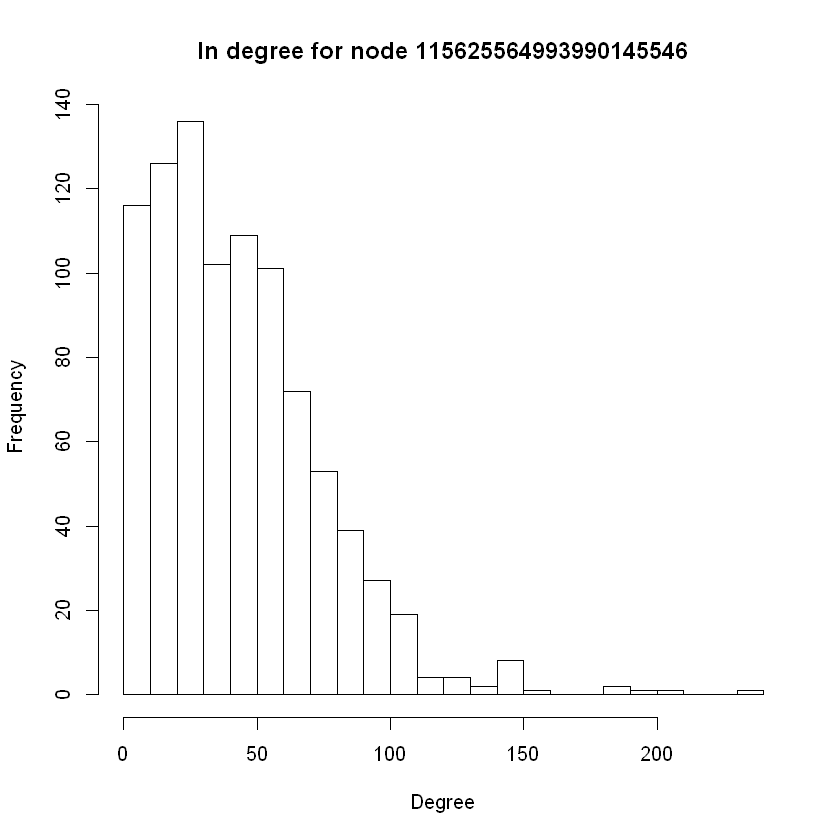

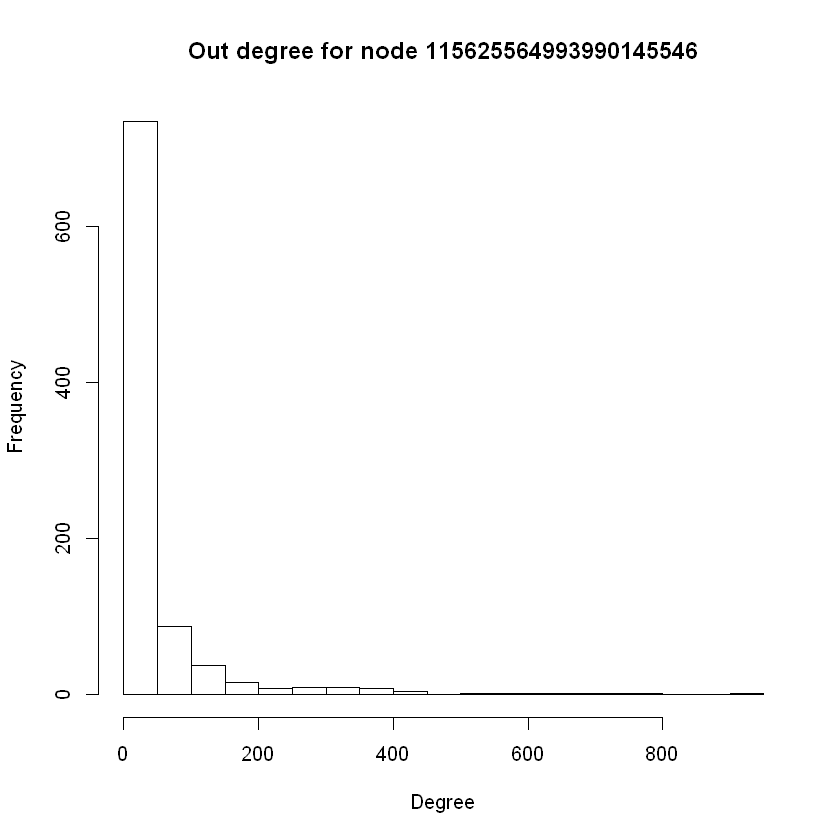

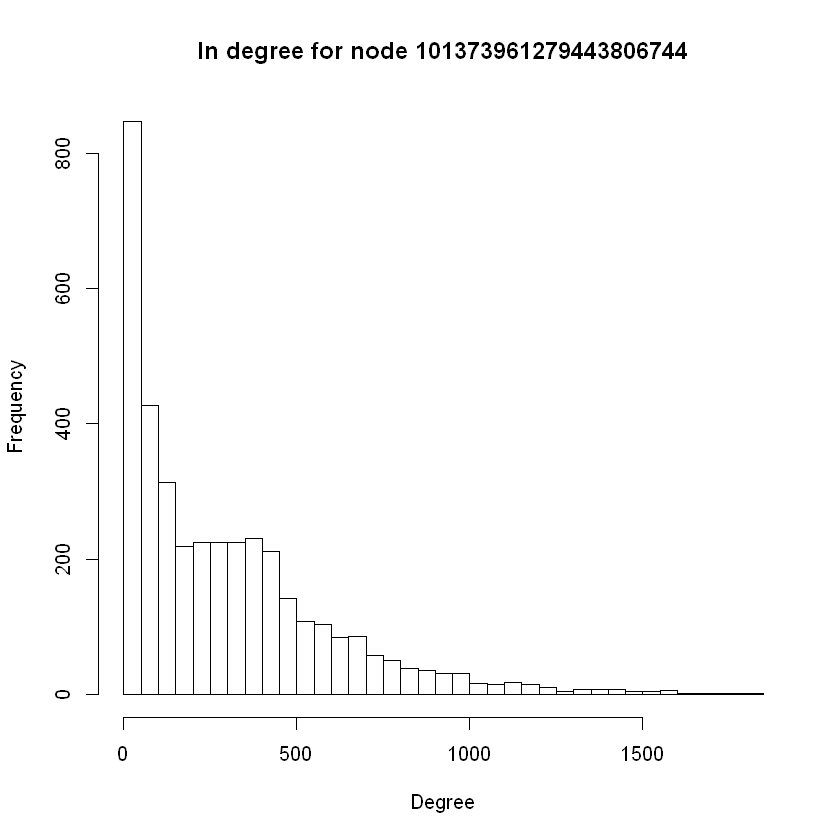

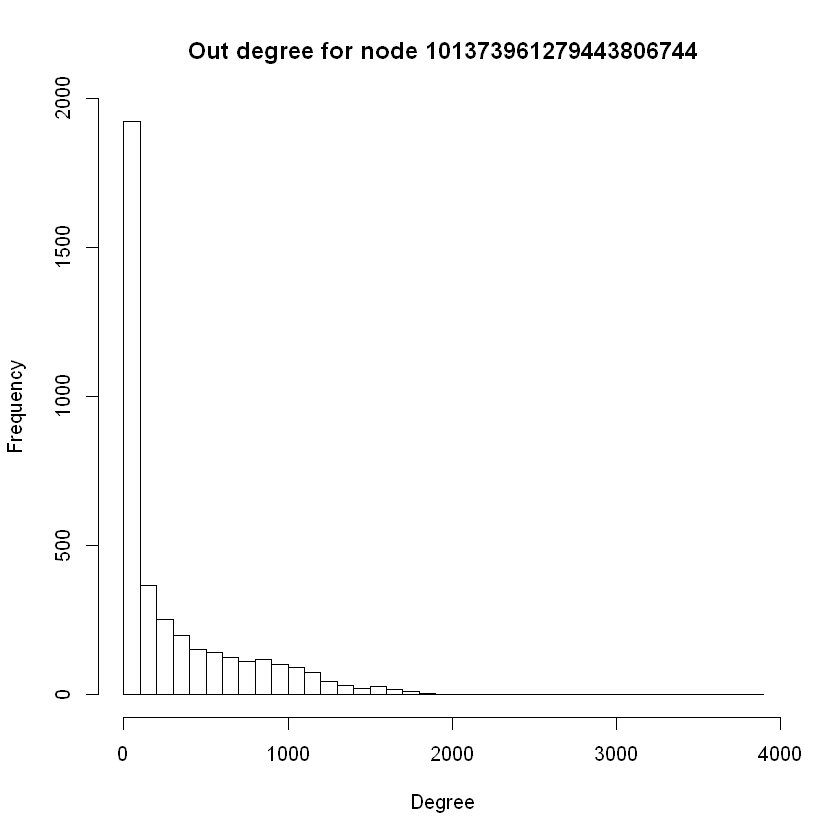

In [5]:
for (core_node in target_nodes){
    graph = get_graph(core_node)$graph
    hist(degree(graph, mode="in"),
         main=paste("In degree for node", core_node),
         xlab="Degree", ylab="Frequency", breaks=30)
    hist(degree(graph, mode="out"),
         main=paste("Out degree for node", core_node),
         xlab="Degree", ylab="Frequency", breaks=30)
}

## Question 20

[1] "Modularity: 0.252765"
[1] "Modularity: 0.319473"


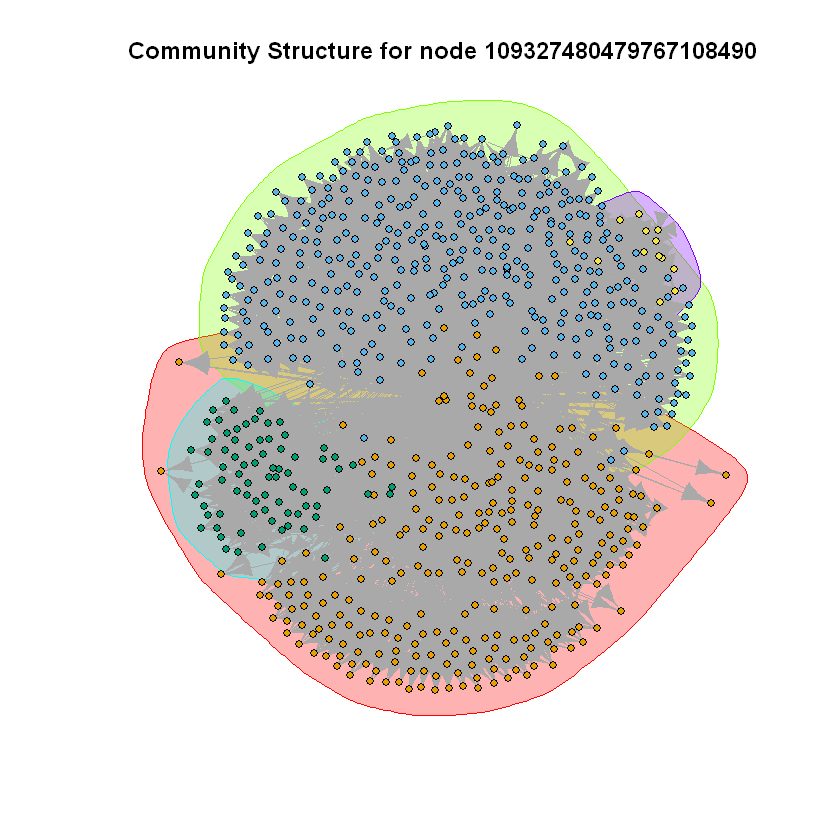

[1] "Modularity: 0.191090"


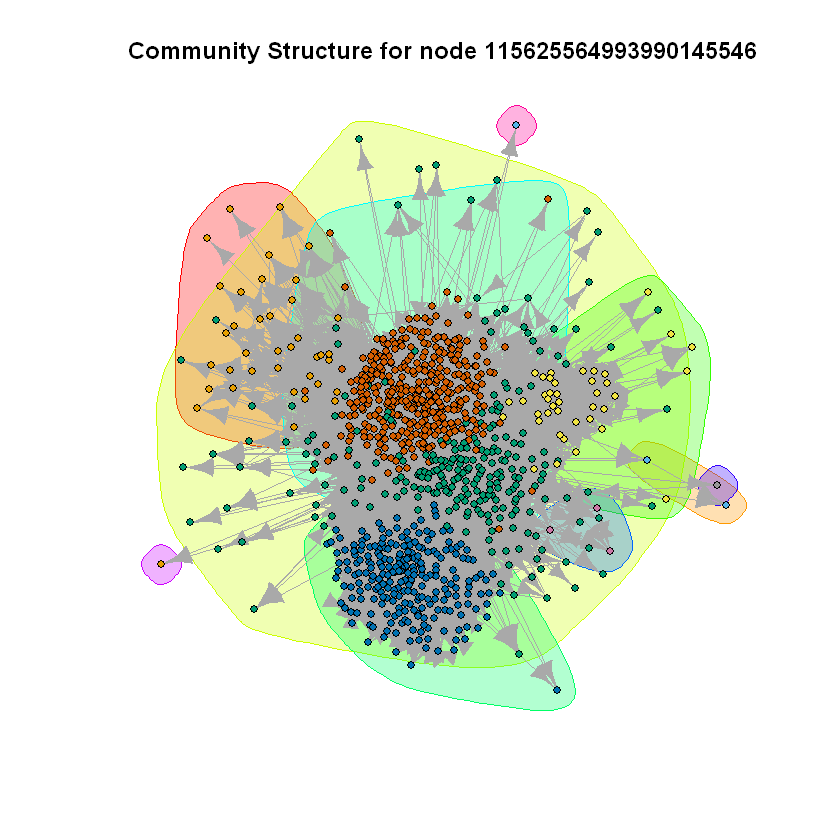

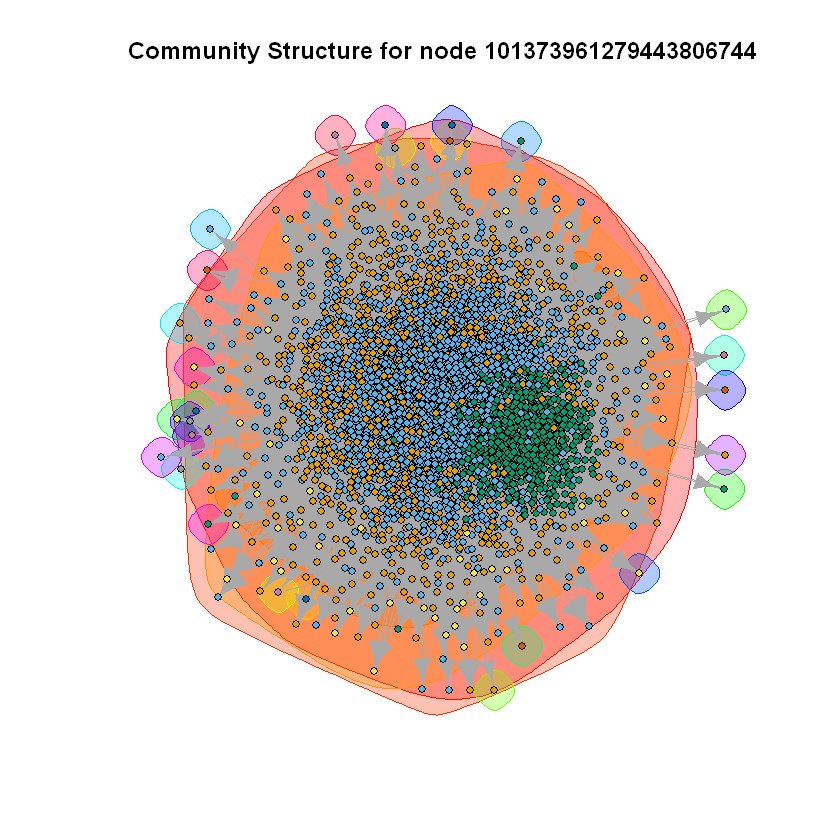

In [6]:
for (core_node in target_nodes){
    graph = get_graph(core_node)$graph
    clusters = cluster_walktrap(graph)
    mod = modularity(clusters)
    print(sprintf("Modularity: %f", mod))
    plot(graph, mark.groups = clusters, edge.width=0.5,
         vertex.size=3, vertex.color=clusters$membership, vertex.label="",
         main=paste("Community Structure for node", core_node))
}

## Question 22

In [51]:
for (core_node in target_nodes){
    
    results = get_graph(core_node)
    
    # Calculate N
    circles = results$circles
    all_circle = unique(c(unlist(circles)))
    N = length(all_circle)
    
    # Find clusters
    graph = results$graph
    clusters = cluster_walktrap(graph)
    
    # Calculate H(C)
    h_c = 0
    for (circle in circles){
        a_i = length(circle)
        h_c = h_c - ((a_i/N) * log10(a_i/N))
    }
    
    # Calculate H(K)
    h_k = 0
    for (i in 1:length(clusters)){
        cluster_nodes = clusters[[i]]
        b_i = length(intersect(cluster_nodes, all_circle))
        if (b_i != 0){
            h_k = h_k - ((b_i/N) * log10(b_i/N))
        } 
    }
    
    # Calculate H(C|K)
    h_ck = 0
    for (j in 1:length(clusters)){
        cluster_nodes = clusters[[j]]
        b_j = length(intersect(cluster_nodes, all_circle))
        if (b_j != 0) {
            for (i in 1:length(circles)){
                circle_nodes = circles[[i]]
                A_ji = length(unique(intersect(cluster_nodes, circle_nodes)))
                if (A_ji != 0){
                    h_ck = h_ck - ((A_ji/N) * log10(A_ji/b_j))
                }          
            }
        }  
    }
    
    # Calculate H(K|C)
    h_kc = 0
    for (i in 1:length(circles)){
        circle_nodes = circles[[i]]
        a_i = length(circle_nodes)
        if (a_i != 0) {
            for (j in 1:length(clusters)){
                cluster_nodes = clusters[[j]]
                A_ij = length(unique(intersect(cluster_nodes, circle_nodes)))
                if (A_ij != 0){
                    h_kc = h_kc - ((A_ij/N) * log10(A_ij/a_i))
                }              
            }
        }
    }
    
    # Calculate homogenity, completeness and V-measure
    h = 1 - (h_ck / h_c)
    c = 1 - (h_kc / h_k)
    v = 2 * (h * c) / (h + c)
    
    print(sprintf("Node ID: %s", core_node))
    print(sprintf("Entropy H(C) = %5.8f", h_c))
    print(sprintf("Entropy H(K) = %5.8f", h_k))
    print(sprintf("Conditional Entropy H(C|K) = %5.8f", h_ck))
    print(sprintf("Conditional Entropy H(K|C) = %5.8f", h_kc)) 
    print(sprintf("Homogeneity h= %5.8f", h))
    print(sprintf("Completeness c= %5.8f", c))    
    print(sprintf("V-measure V= %5.8f", v))
    cat("\n")
}

[1] "Node ID: 109327480479767108490"
[1] "Entropy H(C) = 0.45634767"
[1] "Entropy H(K) = 0.43655637"
[1] "Conditional Entropy H(C|K) = 0.06759188"
[1] "Conditional Entropy H(K|C) = 0.29254781"
[1] "Homogeneity h= 0.85188512"
[1] "Completeness c= 0.32987391"
[1] "V-measure V= 0.47558710"

[1] "Node ID: 115625564993990145546"
[1] "Entropy H(C) = 3.67636649"
[1] "Entropy H(K) = 0.46955527"
[1] "Conditional Entropy H(C|K) = 2.01505212"
[1] "Conditional Entropy H(K|C) = 2.07729483"
[1] "Homogeneity h= 0.45189030"
[1] "Completeness c= -3.42396235"
[1] "V-measure V= 1.04119642"

[1] "Node ID: 101373961279443806744"
[1] "Entropy H(C) = 0.16690804"
[1] "Entropy H(K) = 0.21425076"
[1] "Conditional Entropy H(C|K) = 0.16626265"
[1] "Conditional Entropy H(K|C) = 0.53653499"
[1] "Homogeneity h= 0.00386671"
[1] "Completeness c= -1.50423839"
[1] "V-measure V= 0.00775334"

